In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
fh = open("input-data.txt", "r")
data = np.array([np.array(list(map(float, line.split()))) for line in fh.readlines()])
fh.close()

In [3]:
v2 = data[:12]
v3 = data[12:25]
v4 = data[25:]

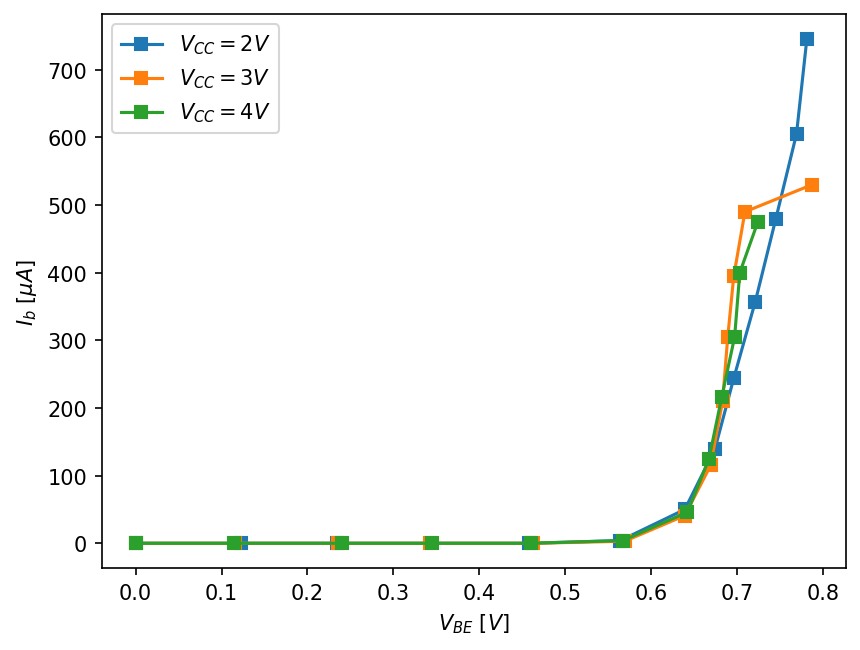

In [4]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.plot(v2[:, 0], v2[:, 1], marker='s', label="$V_{CC} = 2V$")
ax.plot(v3[:, 0], v3[:, 1], marker='s', label="$V_{CC} = 3V$")
ax.plot(v4[:, 0], v4[:, 1], marker='s', label="$V_{CC} = 4V$")
ax.legend()
ax.set_xlabel("$V_{BE}~[V]$")
ax.set_ylabel(r"$I_b ~ [\mu A]$")
fig.savefig("input.png")

In [5]:
fh = open("output-data.txt", "r")
data2 = np.array([np.array(list(map(float, line.split()))) for line in fh.readlines()])
fh.close()

In [6]:
i10 = data2[:21]
i20 = data2[21:58]
i30 = data2[58:]

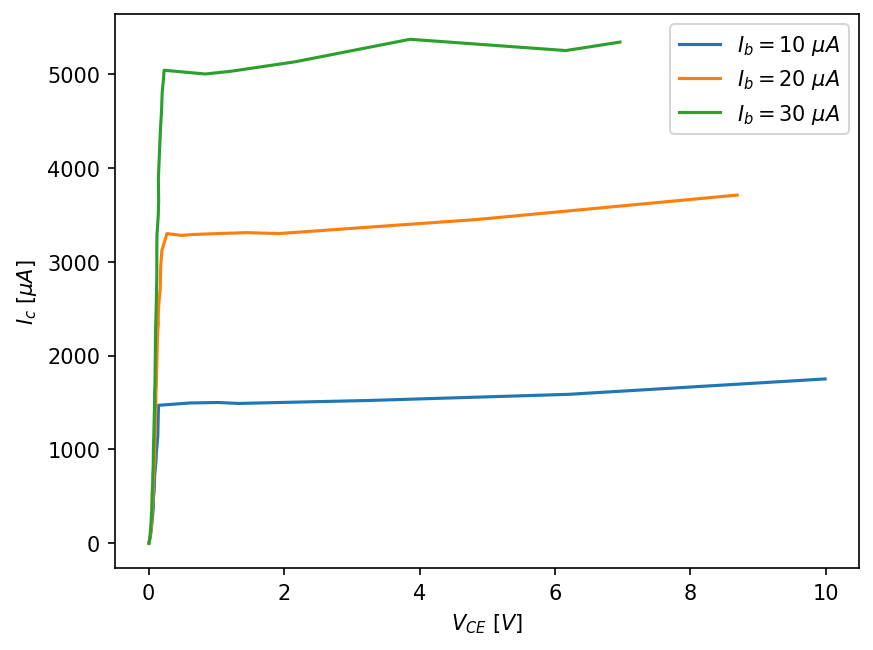

In [7]:
fig, ax = plt.subplots(1, 1, dpi=150)
ax.plot(i10[:, 2], i10[:, 0], label=r"$I_b = 10 ~\mu A$")
ax.plot(i20[:, 2], i20[:, 0], label=r"$I_b = 20 ~\mu A$")
ax.plot(i30[:, 2], i30[:, 0], label=r"$I_b = 30 ~\mu A$")
ax.legend()
# ax.set_xlim(0, 0.7)
ax.set_xlabel("$V_{CE}~[V]$")
ax.set_ylabel(r"$I_c ~ [\mu A]$")
fig.savefig("output.png")

In [8]:
fh = open("gain-data.txt", "r")
data3 = np.array([np.array(list(map(float, line.split()))) for line in fh.readlines()])
fh.close()
v2 = data3[:12]
v3 = data3[12:25]
v4 = data3[25:]

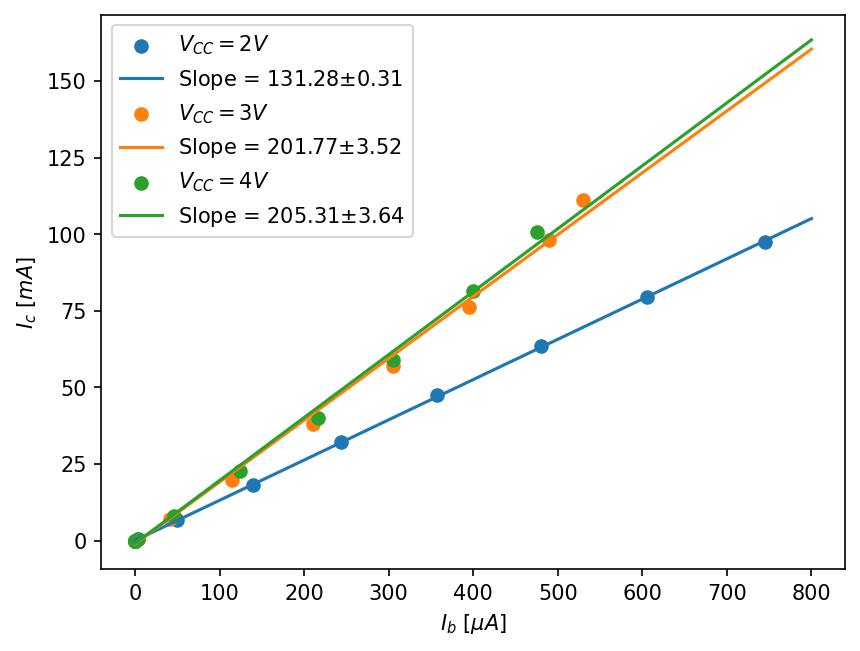

In [9]:
def lin(x, m, c):
    return m*x + c
xs3 = np.linspace(0, 800, 10)
fig, ax = plt.subplots(1, 1, dpi=150)
ax.scatter(v2[:, 0], v2[:, 1], label="$V_{CC} = 2V$")
popt, pcov = curve_fit(lin, v2[:, 0], v2[:, 1])
ax.plot(xs3, lin(xs3, popt[0], popt[1]), label=f"Slope = {popt[0]*1e3:.2f}"+r"$\pm$"+f"{np.sqrt(np.diag(pcov))[0]*1e3:.2f}")
ax.scatter(v3[:, 0], v3[:, 1], label="$V_{CC} = 3V$")
popt, pcov = curve_fit(lin, v3[:, 0], v3[:, 1])
ax.plot(xs3, lin(xs3, popt[0], popt[1]), label=f"Slope = {popt[0]*1e3:.2f}"+r"$\pm$"+f"{np.sqrt(np.diag(pcov))[0]*1e3:.2f}")
ax.scatter(v4[:, 0], v4[:, 1], label="$V_{CC} = 4V$")
popt, pcov = curve_fit(lin, v4[:, 0], v4[:, 1])
ax.plot(xs3, lin(xs3, popt[0], popt[1]), label=f"Slope = {popt[0]*1e3:.2f}"+r"$\pm$"+f"{np.sqrt(np.diag(pcov))[0]*1e3:.2f}")
ax.legend()
ax.set_ylabel(r"$I_c ~[mA]$")
ax.set_xlabel(r"$I_b ~ [\mu A]$")
fig.savefig("gain.png")